<a href="https://colab.research.google.com/github/SHAZAN01/Machine-Learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objective

Polynomial Regression

## Example - 1
Polynomial Regression using Random values

Intercept (β₀): 1.40
Coefficients (β₁, β₂, ... β₍2₎): [0.  0.7 0.5]
Predictions for new data points: [23.6 30.8]
Mean Squared Error (MSE) on training data: 0.72


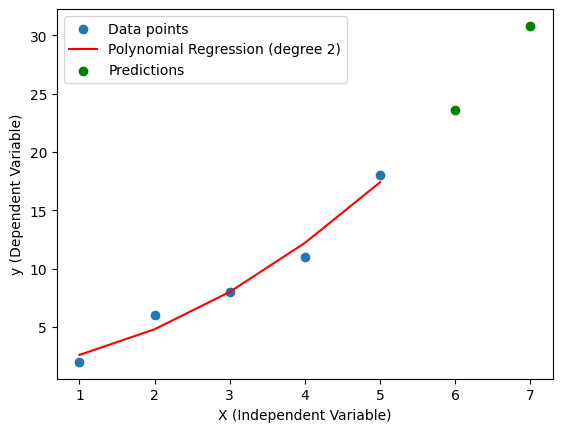

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable (reshaped to a column vector)
y = np.array([2, 6, 8, 11, 18])              # Dependent variable

# Transform the input features to include polynomial terms
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Get the model parameters (intercept and coefficients)
intercept = model.intercept_
coefficients = model.coef_

# Make predictions on new data points
new_data_points = np.array([[6], [7]])
new_data_points_poly = poly_features.transform(new_data_points)
predictions = model.predict(new_data_points_poly)

# Calculate Mean Squared Error (MSE) on the training data
y_pred_train = model.predict(X_poly)
mse_train = mean_squared_error(y, y_pred_train)

# Print the model parameters and predictions
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Coefficients (β₁, β₂, ... β₍{degree}₎): {coefficients}")
print(f"Predictions for new data points: {predictions}")
print(f"Mean Squared Error (MSE) on training data: {mse_train:.2f}")

# Plot the data and the polynomial regression curve
plt.scatter(X, y, label='Data points')
plt.plot(X, model.predict(X_poly), color='red', label=f'Polynomial Regression (degree {degree})')
plt.scatter(new_data_points, predictions, color='green', label='Predictions')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.show()


At the end of the experiment, you will be able to understand:

* Polynomial Linear Regression

# Example - 2

### Pendulum (Polynomial Linear Regression)

Dataset available as "pendulum.txt" in datasets folder.

The dataset consists of two columns and 90 rows. Each column represents a characteristic of a simple pendulum i.e  **l** (length) and **t** (time period). The dataset describes the relationship between the **l** and **t** which is $𝐿∝𝑇^2$.

#### Import required Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####  Load the data

In [ ]:
l=['l','t']
df=pd.read_csv('/content/pendulum.txt',sep="\s+",names=l)
df.head()

,l,t
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568


### Plot the Dataset using Visualization libraries

**Plotting** $𝐿∝𝑇$.

<Axes: >

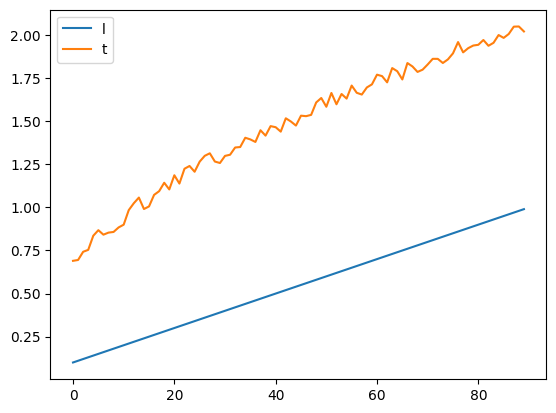

In [ ]:
df.plot()

**Plotting** $𝐿∝𝑇^2$.

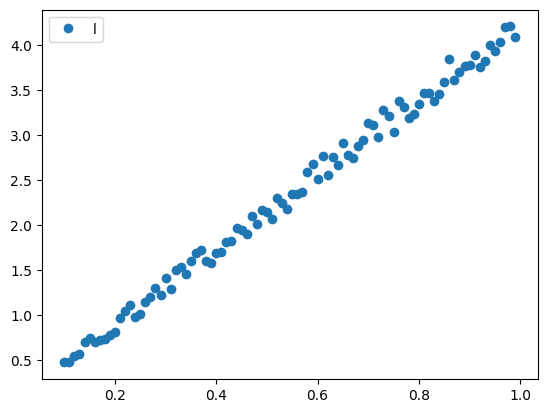

In [ ]:
plt.plot(df['l'],df['t']**2,'o')
t=["l","t2"]
plt.legend(labels=t)

<Axes: >

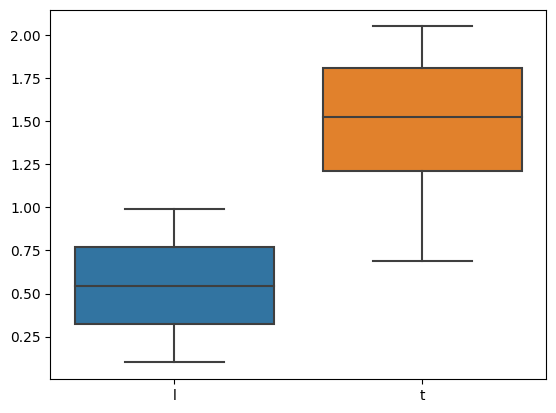

In [ ]:
import seaborn as sns
sns.boxplot(df)

**Hint**: Our dataset is of shape (90,2), where feature shape is (90,) and labels shape is (90,). With this when we train, the values will be considered as a single set of features. Hence, to overcome this, we are reshaping the data into 2 dimensions (90,1) where each value is taken as a single feature.

The label will always be a single value, so we don't need to reshape it. But in further experiments where we perform train_test_split we should maintain the same no.of samples for both features and labels.

Hence reshaping $l$ and $t$ to a 2-D array.

In this notebook, you could try with and without a reshaping label.

To know more about reshaping, you can refer to the below link :
https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

## Data Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

### Splitting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['l'], df['t'], test_size=0.2, random_state=2)
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((72,), (18,), (72,), (18,))

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
lin_y_pred = lr.predict(np.array(x_test).reshape(-1,1))

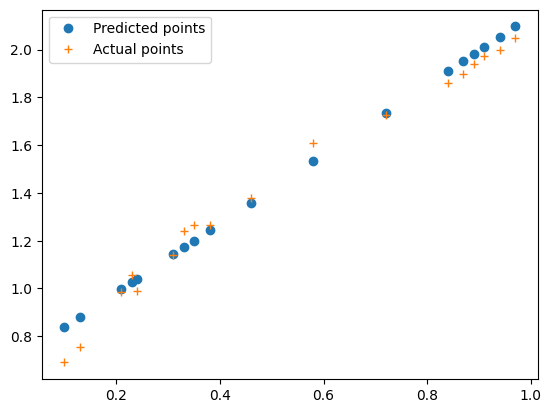

In [ ]:
plt.plot(x_test, lin_y_pred,"o",label='Predicted points')
plt.plot(x_test, y_test,"+",label='Actual points')
plt.legend()

In [ ]:
linear_mse = mean_squared_error(y_pred,y_test)
linear_rmse=np.sqrt(mean_squared_error(y_pred,y_test))
linear_mae = mean_absolute_error(y_pred,y_test)
linear_r2 = r2_score(y_pred,y_test)
print("Linear Performance Metrics:\n\tMean squared error:\t{}\n\tRoot Mean squared error:{}\n\tMean absolute error:\t{}\n\tR2-score:\t\t{}".format(linear_mse,linear_rmse,linear_mae,linear_r2))

Linear Performance Metrics:
	Mean squared error:	0.003993980457466281
	Root Mean squared error:0.06319794662381271
	Mean absolute error:	0.05127418294280364
	R2-score:		0.9792286723505853


### Polynomial Regression

In [ ]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(np.array(x_train).reshape(-1,1))
x_test_trans = poly.transform(np.array(x_test).reshape(-1,1))
#include bias parameter
lr.fit(x_train_trans, y_train)
poly_y_pred = lr.predict(x_test_trans)

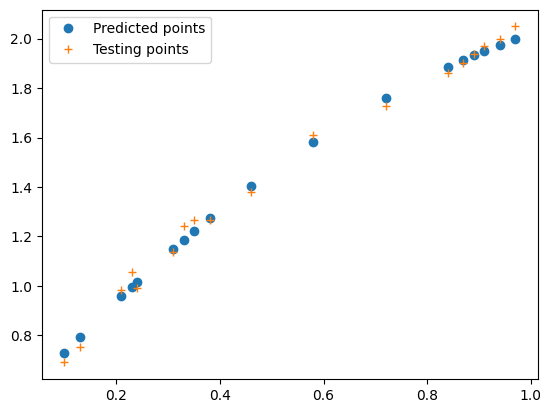

In [ ]:
plt.plot(x_test, poly_y_pred,"o",label='Predicted points')
plt.plot(x_test, y_test,"+",label='Testing points')
plt.legend()

In [ ]:
poly_mse = mean_squared_error(poly_y_pred,y_test)
poly_rmse=np.sqrt(mean_squared_error(poly_y_pred,y_test))
poly_mae = mean_absolute_error(poly_y_pred,y_test)
poly_r2 = r2_score(poly_y_pred,y_test)
print("Polynomial Performance Metrics:\n\tMean squared error:\t{}\n\tRoot Mean squared error:{}\n\tMean absolute error:\t{}\n\tR2-score:\t\t{}".format(poly_mse,poly_rmse,poly_mae,poly_r2))

Polynomial Performance Metrics:
	Mean squared error:	0.001152265088330598
	Root Mean squared error:0.033945030392247375
	Mean absolute error:	0.030225139857449027
	R2-score:		0.9939060460487953


### **Obsevation:**

  By applying a Linear Regression model and Polynomial Regression Model we can say that the **Polynomial model** is a better fit based on **Performance metrics** comparision and **Visuvalization**